# Bayesian Inference for a heat distribution problem
This task is concerned with the investigation of an inverse problem in the context of the heat distribution, expressed by the Poisson equation on the domain $\Omega=[0,1]^2$. In particular, we assume to have boundary conditions for three boundaries given, as well as selected measurements of the solution, i.e. tempeartures inside the domain, and aim at recovering the fourth boundary condition from that information.

### The Poisson problem
As said before, we consider the Poisson problem on the unit square. In this setting we cool three sides, i.e. we fix a Dirichlet boundary condition with a constant temperature of zero degrees on the bottom, right-hand side and the top. On the left boundary, an *unknown* heating is applied, which is a not necessarily constant, non-zero Dirichlet boundary condition. We formalize the problem as 
$$
\begin{align}
\nabla^2 u(x,y) &= 0, &&(x,y)\in (0,1)^2 \\
u(x,0) &= 0, &&x\in(0,1) \\
u(x,1) &= 0 && x\in(0,1) \\
u(1,y) &= 0 && y\in [0,1] \\
u(0,y) &= f(y) && y\in[0,1]
\end{align}
$$
Here $f:[0,1] \to \mathbb{R}$ models to the unknown "heating" on the left boundary of the square. We want to infer the left boundary condition $f(y) = u(0,y), \ y\in[0,1]$. The above problem can be solved numerically using *finite differences* (FD) with gridsize $h$.


### Boundary representation
We assume that the unknown boundary condition can be approximated as a linear combination of $k$ Gaussian radial basis functions, centered at locations $\{y_1^{bc},\ldots,y_k^{bc}\}$, i.e. 
$$ f(y) = \sum_{j=1}^k \alpha_j \phi(y, y_j^{bc}),$$
where $\alpha:=(\alpha_1, ..., \alpha_k)\in\mathbb{R}^k$ are coefficients and $\phi: [0,1]\times[0,1] \to \mathbb{R}$ is the (1D) *Gaussian radial basis function* (RBF) given by 
$$
\phi(y,y^\prime) = \exp\left(-\frac{(y-y^\prime)^2}{2\ell^2}\right). 
$$

### Collecting measurements
We are given $m$ measurement locations $\left\{ \left( x_i^{\text{obs}}, y_i^{\text{obs}} \right) \right\}_{i=1}^m$.

For these, we solve the Poisson problem, for the given boundary $f$. Note that the above boundary representation allows us to express the currently selected boundary condition $f$ just by the coefficients $\alpha$. Hence, if we write $f$ via the above basis expansion, then the solution of the Poisson equation evaluated at coordinate $(x,y)$ is given by $$u[\alpha](x,y).$$
We can then collect $m$ exact (point!) evaluations as a vector
$$ 
\begin{pmatrix}
u[\alpha](x_1^{\text{obs}}, y_1^{\text{obs}})\\
\vdots \\
u[\alpha](x_m^{\text{obs}}, y_m^{\text{obs}})
\end{pmatrix}
$$
In practice, no technical measurement device is able to provide actual point measurements. It rather collects measurement information that is "smeared out" around the actual point of measurement. We do the same, here, and use "mollified" point evaluations, where we apply a "smearing" with a radius of $\tau$. Hence our measuremnts ar eno longer $u[\alpha](x,y)$ but $u_\tau[\alpha](x,y)$ covering.

More formally, we thereby can now introduce the *forward map* $\Phi: \mathbb{R}^k \to \mathbb{R}^m, \ \alpha \mapsto \Phi(\alpha)$ with 
$$
\Phi(\alpha) := 
\begin{pmatrix}
u_{\tau}[\alpha](x_1^{\text{obs}}, y_1^{\text{obs}})\\
\vdots \\
u_{\tau}[\alpha](x_m^{\text{obs}}, y_m^{\text{obs}})
\end{pmatrix}
$$
This is nothing else than the just introduced (mollified version) of evaluations of the solution in $m$ observations points, if we fix the coefficient vector $\alpha$ describing the boundary condition $f$.

### Data
Participants are given "realistic" measurements for an unknown boundary condition $f$, i.e. unknown $\alpha$, in the $\texttt{measurements.npz}$ file. The data $d = (d_1,\ldots,d_m)$ comes from noisy measurements, i.e. it is generated as 
$$d = \Phi(\alpha) + \sigma_\varepsilon,$$
where the noise $\sigma_\varepsilon$ follows some zero mean distribution.

The file contains 
* the measurement locations $\left\{ \left( x_i^{\text{obs}}, y_i^{\text{obs}} \right) \right\}_{i=1}^m$ and "realistic" measurements $d$,
* an estimate to the noise level of the measured data (which can be helpful for the inference),
* the grid points of the applied finite difference discretization, and
* reference samples from the true (to be found) boundary $f(y)$. These are for **comparison purposes only**!

There exists a helper function load_data, which loads the measurement file and returns the data appropriately. (Please note the documentation of that helper function for further details.)

### Bayesian formulation of the inference task
The objective is now to infer the unknown coefficient vector $\alpha$ from the given data $d$.

In the Bayesian framework, the coefficient vector $\alpha$ is treated as a random variable with prior density $\rho(\alpha)$. Choosing a noise model the likelihood $\rho(d|\alpha)$ and the prior can be used to derive the posterior $\rho(\alpha|d)$.

We intentionally do not go into further details here. Hence we also do not specify a prior or likelihood, but leave it up to the participant to decide on this.

## Task
This file is a minimal starter template for the inverse heat problem. This file provides the participant functions to
* load the measurements.npz data: $\texttt{load\_data}$
* solve the Poisson problem using finite differences for a given coefficient vector $\alpha$ and points $(y_1^{bc},\ldots,y_k^{bc})$: $\texttt{solve\_laplace\_rbf}$
* apply the mollifier: $\texttt{evaluate\_solution\_mollified}$ (not necessarily called manually, just used by the forward map), and to
* evaluate the forward map: $\texttt{forward\_blackbox}$

The task is to
1. Formally model the inference problem using the Bayesian formalism, while choosing a noise model and define the likelihood, prior and formulate the posterior

2. Choose remaining parameters of the boundary representation: $k$ (number of RBFs), centres $(y_1^{bc}, \ldots y_k^{bc})$ and the RBF-width $\ell$.

3. Implement an inference method to approximate or sample from the posterior.

4. Reconstruct $f(y)$ in a Bayesian sense (e.g. also providing a mean and credible bands).

5. Write a (maximum!) one-page PDF document, in which the modeling (choices) is/are outlined and the results are described, together with up to three meaningful plots.

This template intentionally does **not** fix the choice of prior, likelihood, or inference method. It is up to the participant to pick and justify these modelling choices (in the writeup).

Submission and further details

Participants need to provide their submission (one-page PDF, source code) in two different formats:

* **one** PDF containing first the one page write-up and then a concatenated listing of all source codes (the latter ideally in a Jupyter notebook exported to PDF)
* the one page write-up and all source codes and/or binary files as **one compressed archive** which they upload on an online storage of their choice and for which they provide the link as part of the cover letter.

The one single PDF (containing the write-up and the source codes) is submitted to the online portal at https://stellenausschreibungen.uni-wuppertal.de together with the cover letter (containing the link to the compressed archive) and the other application documents.

It is by intention that the description does not cover all aspects of the task. Submitted material will allow to better understand, how participants would approach and document a given task. It should also be noted that the quality of the inferred solution is not the central point of interest. Instead the evaluation rather identifies a working solution, which can be clearly understood in its functionality, as well as explanations that give a clear guidance on the developed solution strategy. Still, as a point of reference, a few samples of the “true” boundary condition are provided.

While working on the solution of the task, participants of the challenge should think of it as a task that they would carry out as PhD student in the group. Therefore, as it would happen with a normal task as a PhD student in our group, any e-mail based interaction, clarification or questioning on unclear points of the task are welcome.

A last word on large language models: Participants are invited to use those as much as they would do it in their daily lives, while assuring that they fully understand what the solution provided by an LLM would do. **If LLMs are used, the full prompt history to complete the challenge has to be submitted as part of the compressed file.**

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.sparse as sp
import scipy.sparse.linalg as spla

from statsmodels.tsa.stattools import acf

plt.rcParams.update({"figure.figsize": (5,4), "font.size": 11})

In [2]:
# Load data
def load_data(path:str):
    """
    Load data. 
    _meas: related to measurements
    sigma: noise level estimate
    _grid: points used for the plotting grid
    _true_: reference samples from the measuremntstrue f(y). For comparison purposes only!

    Returns
    -------
    x_meas, y_meas, u_meas : np.ndarray
        Interior measurement coordinates and corresponding temperatures.
    sigma : float
        Noise level estimate for the measurements.
    x_grid, y_grid : np.ndarray
        Grid points used in the finit difference approximation
    f_true_y, f_true_vals : np.ndarray
        Sparse reference samples of the true boundary function f(y).    
"""

    
    data = np.load(path, allow_pickle=True)
    
    x_meas = data["x_meas"]      
    y_meas = data["y_meas"]        
    u_meas = data["u_meas"]        
    sigma  = float(data["sigma"])  
    
    x_grid = data["x_plot"]        
    y_grid = data["y_plot"]        
    
    # Sparse boundary reference samples (for comparison only)
    f_true_y    = data["f_true_y"]
    f_true_vals = data["f_true_vals"]
    
    return x_meas, y_meas, u_meas, sigma, x_grid, y_grid, f_true_y, f_true_vals


def overview_plots(x_meas, y_meas, u_meas, f_true_y, f_true_vals):
    """
    This function generates two overview plots.
    1. Interior measurements with their corresponding temperatures
    2. Sparse values from the true function f(y) that needs to be inferred. 
       This is for comparison purposes only!
    """
    # Interior measurements
    plt.figure()
    sc = plt.scatter(x_meas, y_meas, c=u_meas, s=40, cmap="viridis")
    plt.colorbar(sc, label="u_meas")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.title("Interior measurement locations")
    plt.tight_layout()
    plt.show()
    
    # Sparse boundary reference samples (left boundary)
    plt.figure()
    plt.grid(True, alpha=0.3)
    plt.scatter(f_true_y, f_true_vals)
    plt.xlabel("y (left boundary x=0)")
    plt.ylabel("Temperature")
    plt.title("Sparse reference samples of f(y)")
    plt.tight_layout()
    plt.show()


def solve_laplace_rbf(N, alpha, y_bc, rbf_width):
    """
    Solves the Laplace equation with a spatially varying Dirichlet BC on the left boundary x = 0:

        u(0, y) = sum_k alpha_k * RBF(y; centre_k, width)
        u(1, y) = 0
        u(x, 0) = 0
        u(x, 1) = 0

    Parameters:
    N (int): Number of interior grid points along one axis.
    alpha (array-like): Coefficients for RBF expansion.
    y_bc (array-like): Locations of the RBF centers along y 
    rbf_width (float): width of the RBF
        Width (standard deviation) of Gaussian RBFs.

    Returns:
    u_grid : 2D numpy array, shape (N+2, N+2). Solution grid including boundaries.
    """
    alpha = np.array(alpha, dtype=float)
    n_points = N * N

    def idx(i, j):
        """Convert (i, j) indices to a flat index."""
        return i * N + j

    # evaluate left boundary (x = 0) (via provided RBF basis expansion)
    y_vals = np.linspace(0, 1, N + 2)  
    left_bc = np.zeros_like(y_vals)
    for k, y in enumerate(y_bc):
        left_bc += alpha[k] * np.exp(-0.5 * ((y_vals - y) / rbf_width) ** 2)

    # Create sparse matrix for Laplacian
    A = sp.lil_matrix((n_points, n_points))
    b = np.zeros(n_points)

    for i in range(N):      # interior x indices
        for j in range(N):  # interior y indices
            k = idx(i, j)
            A[k, k] = -4.0

            # Left neighbour (x = 0): inhomogeneous boundary u = left_bc
            if i > 0:
                A[k, idx(i - 1, j)] = 1.0
            else:
                # interior y index j corresponds to y-index j+1 in left_bc
                b[k] -= left_bc[j + 1]

            # Right neighbour (x = 1): homogeneous boundary u = 0
            if i < N - 1:
                A[k, idx(i + 1, j)] = 1.0
            else:
                b[k] -= 0.0

            # BOTTOM neighbor (y = 0) -> homogeneous boundary u = 0
            if j > 0:
                A[k, idx(i, j - 1)] = 1.0
            else:
                b[k] -= 0.0

            # TOP neighbor (y = 1) -> homogeneous boundary u = 0
            if j < N - 1:
                A[k, idx(i, j + 1)] = 1.0
            else:
                b[k] -= 0.0

    A_csr = A.tocsr()
    u_int = spla.spsolve(A_csr, b)

    # Full grid including boundaries; grid[i,j] corresponds to (x_i, y_j)
    u_grid = np.zeros((N + 2, N + 2))
    u_grid[1:-1, 1:-1] = u_int.reshape((N, N))

    # Apply LEFT boundary at x=0  → index 0 along axis 0
    u_grid[0, :] = left_bc

    # Right, top, bottom boundaries remain zero
    return u_grid


def evaluate_solution_mollified(grid, points, epsilon):
    """
    Evaluates the solution at arbitrary (x, y) points using a Gaussian mollifier.

    Parameters:
    grid (np.array): The solution grid (including boundaries). grid[i,j] = u(x_i, y_j).
    points (list of tuples): List of (x, y) coordinates in the unit square.
    epsilon (float): Standard deviation of the Gaussian mollifier.

    Returns:
    values (list): List of mollified u(x, y) values at the given points.
    """
    N_with_boundary = grid.shape[0]
    x_vals = np.linspace(0, 1, N_with_boundary)
    y_vals = np.linspace(0, 1, N_with_boundary)

    values = []
    X, Y = np.meshgrid(x_vals, y_vals, indexing='ij')

    for x0, y0 in points:
        # Compute Gaussian weights centered at (x0, y0)
        dist_squared = (X - x0)**2 + (Y - y0)**2
        weights = np.exp(-dist_squared / (2 * epsilon**2))

        # Normalise weights
        weights /= np.sum(weights)

        # Weighted average of the grid values
        u_mollified = np.sum(weights * grid)
        values.append(u_mollified)

    return values


def forward_blackbox(alpha, epsilon=0.03):
    """
    Black-box forward map: alpha -> u(alpha) evaluated at measurement_points.

    This assumes that the following globals are defined in the notebook:
    - N_blackbox      : number of interior grid points (N in solve_laplace_rbf)
    - centres, ell    : RBF parameters
    - measurement_points : list of (x,y) interior measurement locations

    Returns
    -------
    np.ndarray: Array of (mollified) model responses u_{tau}[alpha] evaluated at the interior measurement points.
    """
    grid = solve_laplace_rbf(N_blackbox, alpha, centres, ell)
    values = evaluate_solution_mollified(grid, measurement_points, epsilon)
    return np.asarray(values, dtype=float)


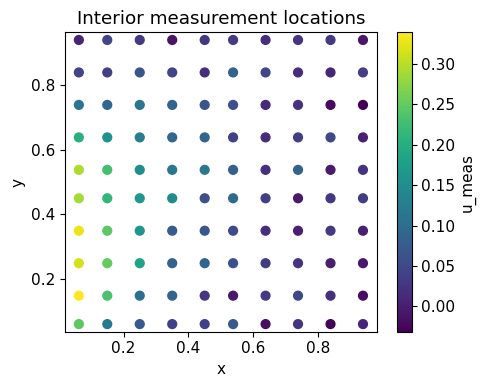

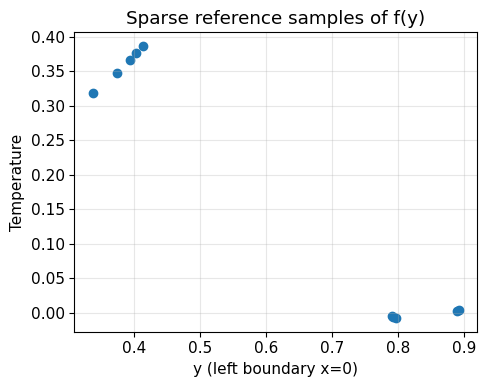

In [3]:
x_meas, y_meas, u_meas, sigma, x_grid, y_grid, f_true_y, f_true_vals = load_data("measurements.npz")
overview_plots(x_meas, y_meas, u_meas, f_true_y, f_true_vals)

### Step 0: define the forward model 
1. K: number of Gaussian radial basis functions (or RBFs)
   - K is essentially the number of degrees of freedom; the larger the value, the more flexible the boundary
   - K has to be << number of measurements
   - As the boundary is a temperature profile, we'd expect it to be smooth and no sharp oscillations. Therefore we can choose a smaller value for K
2. centres: centered lovations of RBF
   - uniform spacing is chosen, as we don't have prior reasons to believe any part of the boundary is more variable
3. ell: RBF width
   - each RBF should overlap with its neighbors. Therefore, if spacing between centers is roughly 1/K, then we can choose ell to be somewhere around 1/K or 2/K
4. N_blackbox: PDE grid resolution, which controls numerical accuracy of the partial differential equation
   - 30-50 would be standard

In [7]:
# choose parameters

K = 10 # number of RBFs
centres = np.linspace(0.05, 0.95, K) # centered locations of RBF, chosen to be uniform along the boundary 
ell = 0.15 # RBF width
N_blackbox = 40 # PDE grid
measurement_points = list(zip(x_meas, y_meas))


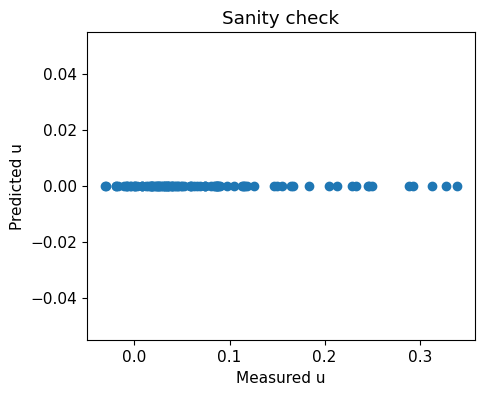

In [10]:
# sanity check

alpha_test = np.zeros(K) # assume the unknown boundary temperature is identically zero
pred = forward_blackbox(alpha_test)

plt.scatter(u_meas, pred)
plt.xlabel("Measured u")
plt.ylabel("Predicted u")
plt.title("Sanity check")
plt.show()


As a sanity check, we evaluate the forward model at zero boundary conditions, which yields a trivial solution that mismatches the interior measurements. This confirms that the inverse problem is non-trivial and that the model is not overfitting by construction.

### Step 1: define the Bayesian posterior
We want to infer the distribution of coefficients $\alpha$, for which we can use the posterior $$ p(\alpha | u_{meas}) \propto p(u_{meas}|\alpha) \cdot p(\alpha) $$ where $p(u_{meas}|\alpha)$ is the likelihood and $p(\alpha)$ the prior.

Log-densities are used in the computation, as they are numerically more stable. The choice of prior and likelihood is justified in the writeup.

1. likelihood:
   - assume measurements satisfy: $$ u_{meas} = \Phi(\alpha) + \eta, \: \eta \sim \mathcal{N}(0, \sigma^2 I) $$ implying they are centered at 0, have the same variance, and their errors are independent.
   - therefore, the log-likelihood could be formulated as $$ \text{log} \, p(u_{meas}|\alpha) = -\frac{1}{2\sigma^2} \lVert u_{meas} - \Phi(\alpha) \rVert^2 + C $$ where the constant $C$ can be dropped.
2. prior:
   - assume $$ \alpha \sim \mathcal{N}(0, \tau^2 I) $$ which implies there is no preferred sign in the coefficients, and that small values are more likely (which prevents extreme boundary values).
   - therefore, the log-prior could be formulated as $$ \text{log} \, p(\alpha) = -\frac{1}{2\tau^2} \lVert \alpha \rVert^2 + C $$
3. poterior:
   - the log-posterior can be written as $$ \text{log} \, p(\alpha | u_{meas}) = \text{log} \, p(u_{meas}|\alpha) + \text{log} \, p(\alpha) $$
  
In short, we formulate a Bayesian inverse problem with a Gaussian prior on the boundary coefficients and a Gaussian likelihood derived from the measurement noise.

In [12]:
# posterior for coefficients alpha

## likelihood
def log_likelihood(alpha):
    """
    Gaussian likelihood:
    u_meas = Phi(alpha) + noise, noise ~ N(0, sigma^2 I)
    """
    pred = forward_blackbox(alpha)
    residual = u_meas - pred
    return -0.5 * np.sum(residual**2) / sigma**2

## prior
tau = 1.0 # a moderate value of tau is chosen, so we have a weakly informative prior that allows the data to dominate where informative

def log_prior(alpha):
    """
    Gaussian prior on alpha
    """
    return -0.5 * np.sum(alpha**2) / tau**2

## posterior
def log_posterior(alpha):
    return log_likelihood(alpha) + log_prior(alpha)


In [14]:
# sanity checks

## evaluate at zero
alpha0 = np.zeros(K)
print("log-posterior at zero:", log_posterior(alpha0)) # should return a finite number

## random perturbation
alpha_rand = 0.1 * np.random.randn(K)
print("log-posterior at random alpha:", log_posterior(alpha_rand)) # should return a different value

## evaluate at extreme value
alpha_bad = 10.0 * np.ones(K)
print("log-posterior at large alpha:", log_posterior(alpha_bad)) # should be really negative


log-posterior at zero: -1606.1525063008626
log-posterior at random alpha: -1235.3970492847805
log-posterior at large alpha: -19658214.424544748


### Step 2: sampling the posterior
With the elements from the previous step, we could generate samples from the posterior given by $$ p(\alpha | u_{meas}) \propto \text{exp}\left(-\frac{1}{2\sigma^2} \lVert u_{meas} - \Phi(\alpha) \rVert^2 - \frac{1}{2\tau^2} \lVert \alpha \rVert^2 \right) $$

We attempted the Markov chain Monte Carlo approach, for the reasons elaborated in the writeup. 

In [87]:
# MCMC sampling

## metropolis sampler
def metropolis_sampler(alpha0, n_steps=10000, step_size=0.05):
    alpha = alpha0.copy() # we start at some alpha_0
    logp = log_posterior(alpha) # compute log-posterior of alpha_0

    chain = []
    accepted = 0

    for _ in range(n_steps):
        proposal = alpha + step_size * np.random.randn(len(alpha)) # propose new alpha'
        logp_prop = log_posterior(proposal) # compute log-posterior of alpha'

        # accept alpha' w.p. min{1, exp(logp(alpha′)−logp(alpha))}
        if np.log(np.random.rand()) < logp_prop - logp:
            alpha = proposal 
            logp = logp_prop
            accepted += 1

        chain.append(alpha.copy())

    print("Acceptance rate:", accepted / n_steps) # should be 20%-40%. if too low (/high), then decrease (/increase) step size
    return np.array(chain)


## initialize
K = len(centres) # number of RBF coefficients
alpha0 = np.zeros(K) # starting point

n_steps = 20000
step_size = 0.01

## run
chain = metropolis_sampler(alpha0, n_steps, step_size)


Acceptance rate: 0.34115


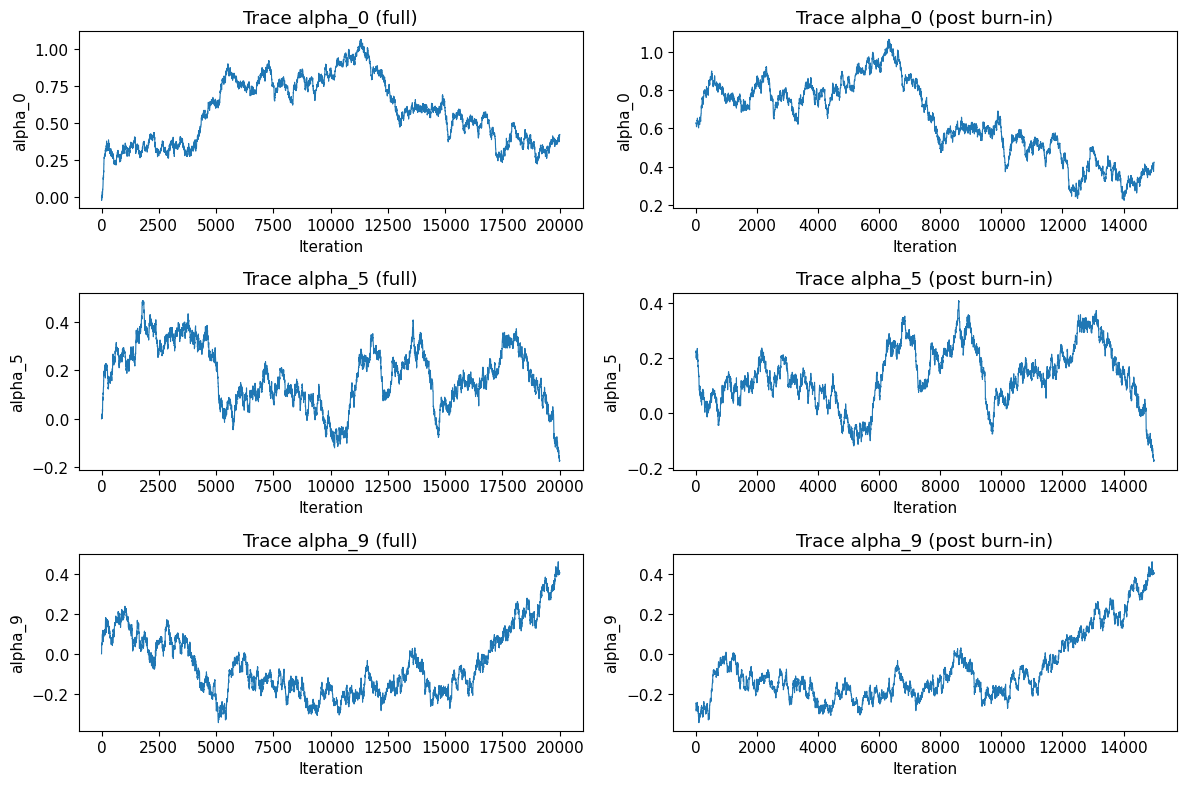

In [94]:
## check convergence

coeff_indices = [0, K//2, K-1] # choose coefficients that are spatially separated along the boundary
burn_in = 5000
#burn_in = 2000

### trace plots of representative coefficients 
plt.figure(figsize=(12, 8))

for i, k in enumerate(coeff_indices):
    # full chain
    plt.subplot(3, 2, 2*i + 1)
    plt.plot(chain[:, k], linewidth=0.8)
    plt.title(f"Trace alpha_{k} (full)")
    plt.xlabel("Iteration")
    plt.ylabel(f"alpha_{k}")

    # post burn-in
    plt.subplot(3, 2, 2*i + 2)
    plt.plot(chain[burn_in:, k], linewidth=0.8)
    plt.title(f"Trace alpha_{k} (post burn-in)")
    plt.xlabel("Iteration")
    plt.ylabel(f"alpha_{k}")

plt.tight_layout()
plt.show()
# chain jumps around, implying the sampler is exploring the posterior properly

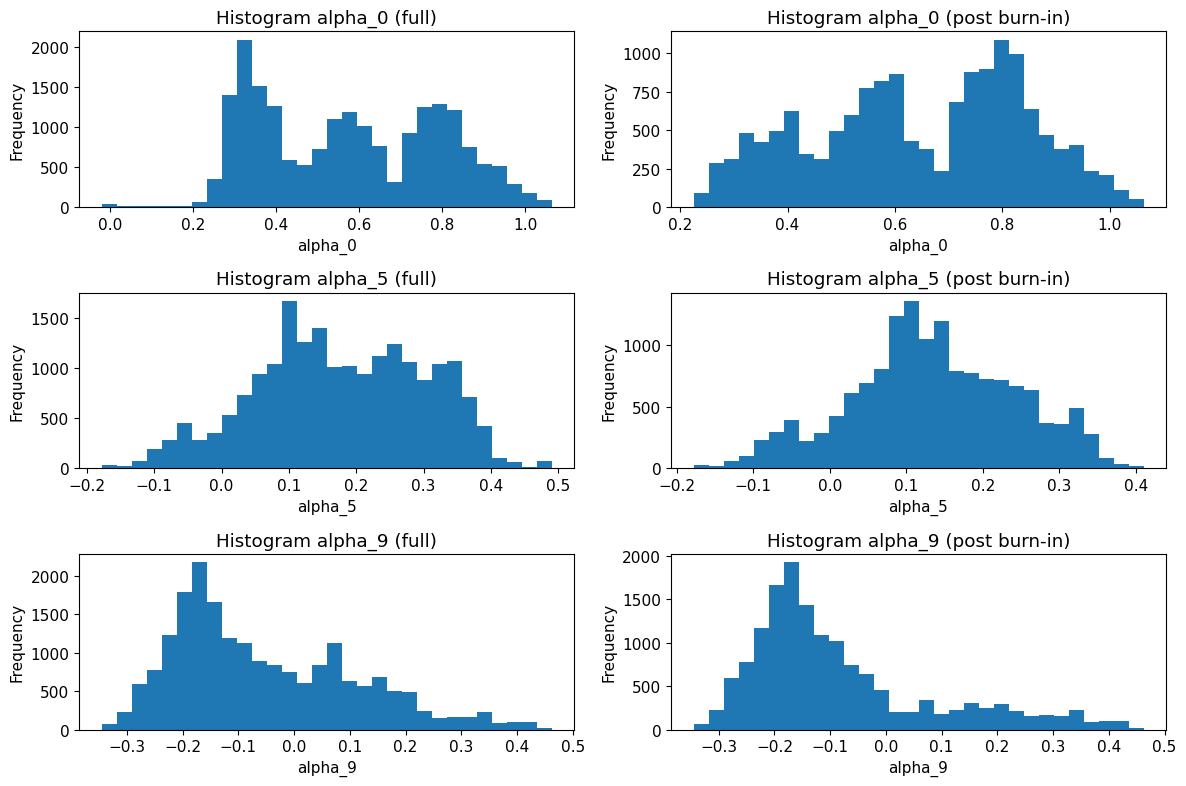

In [95]:
### histograms of posteriors
plt.figure(figsize=(12, 8))

for i, k in enumerate(coeff_indices):
    # full chain 
    plt.subplot(3, 2, 2*i + 1)
    plt.hist(chain[:, k], bins=30)
    plt.title(f"Histogram alpha_{k} (full)")
    plt.xlabel(f"alpha_{k}")
    plt.ylabel("Frequency")

    # post burn-in 
    plt.subplot(3, 2, 2*i + 2)
    plt.hist(chain[burn_in:, k], bins=30)
    plt.title(f"Histogram alpha_{k} (post burn-in)")
    plt.xlabel(f"alpha_{k}")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
# there are multiple peaks for alpha_0, which implies high uncertainty
# the distributions of alpha_5 and alpha_9 look more narrow after burn-in, suggesting an improvement

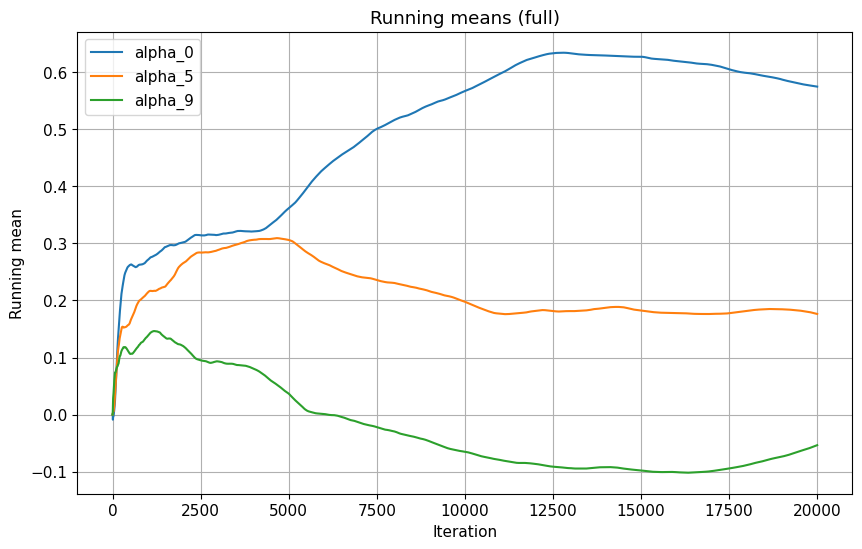

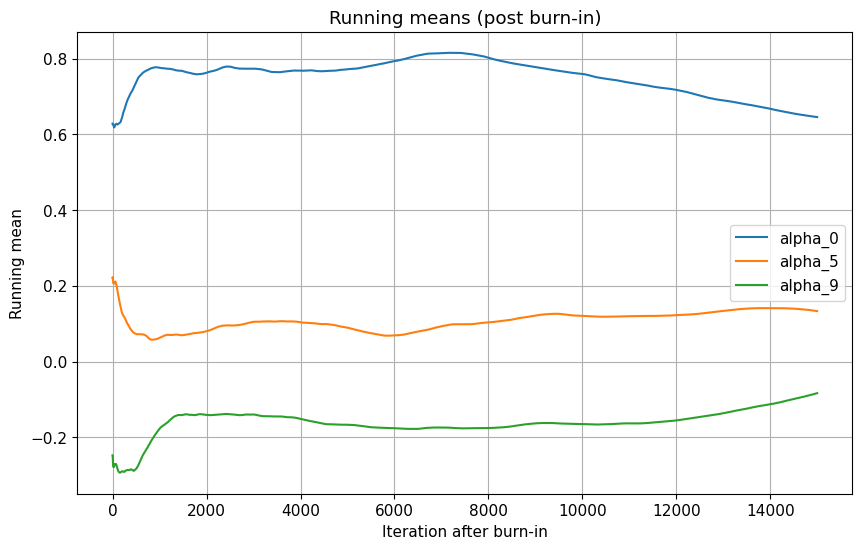

In [97]:
### running mean

def running_mean(chain):
    return np.cumsum(chain) / np.arange(1, len(chain)+1)

idxs = [0, 5, 9] # indices of the coefficients we care about

running = {k: running_mean(chain[:, k]) for k in idxs} # running means

plt.figure(figsize=(10, 6))
for k in idxs:
    plt.plot(running[k], label=f"alpha_{k}")
plt.title("Running means (full)")
plt.xlabel("Iteration")
plt.ylabel("Running mean")
plt.legend()
plt.grid(True)
plt.show()

burn_in = 5000  
running_burn = {k: running_mean(chain[burn_in:, k]) for k in idxs}

plt.figure(figsize=(10, 6))
for k in idxs:
    plt.plot(running_burn[k], label=f"alpha_{k}")
plt.title(f"Running means (post burn-in)")
plt.xlabel("Iteration after burn-in")
plt.ylabel("Running mean")
plt.legend()
plt.grid(True)
plt.show()

# the means seems to stabilize after burn-in, suggesting convergence

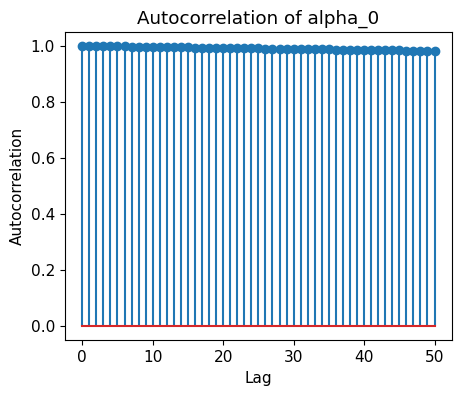

In [101]:
## check for autocorrelation
k = 0
acf_vals = acf(posterior_chain[:,k], nlags=50)

plt.stem(acf_vals)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title(f"Autocorrelation of alpha_{k}")
plt.show()


In [92]:
## burn-in and posterior mean
posterior_chain = chain[burn_in:]

alpha_mean = posterior_chain.mean(axis=0)
print(alpha_mean)

[ 0.64545675 -0.30655996  0.43607615 -0.29222167  0.36329164  0.13320467
 -0.10898938  0.16170448 -0.02434316 -0.08346573]


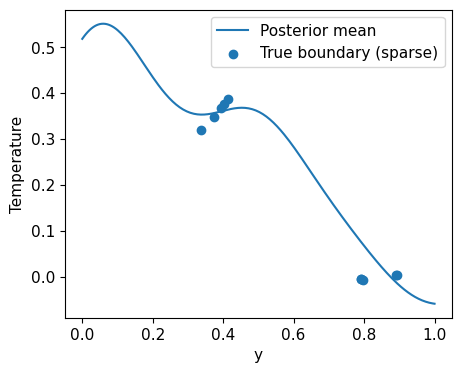

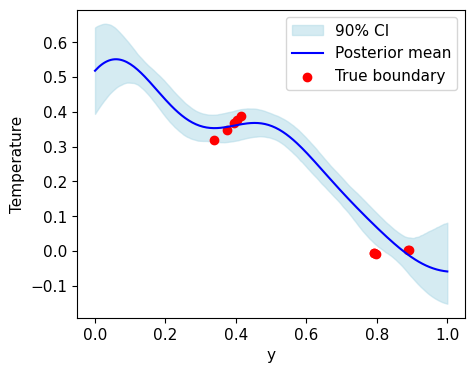

In [105]:
## plot reconstructed boundary
y_plot = np.linspace(0, 1, 200)
f_mean = np.sum([
    alpha_mean[k] * np.exp(-0.5*((y_plot-centres[k])/ell)**2)
    for k in range(K)
], axis=0)

plt.plot(y_plot, f_mean, label="Posterior mean")
plt.scatter(f_true_y, f_true_vals, label="True boundary (sparse)")
plt.xlabel("y")
plt.ylabel("Temperature")
plt.legend()
plt.show()

## credible intervals
f_samples = np.array([
    np.sum([a[k]*np.exp(-0.5*((y_plot-centres[k])/ell)**2) for k in range(K)], axis=0)
    for a in posterior_chain
])

lower = np.percentile(f_samples, 5, axis=0)
upper = np.percentile(f_samples, 95, axis=0)

plt.fill_between(y_plot, lower, upper, color='lightblue', alpha=0.5, label="90% CI")
plt.plot(y_plot, f_mean, color='blue', label="Posterior mean")
plt.scatter(f_true_y, f_true_vals, color='red', label="True boundary")
plt.xlabel("y")
plt.ylabel("Temperature")
plt.legend()
plt.savefig("boundary_reconstruction.png", dpi=1200, bbox_inches="tight")
plt.show()
